<a href="https://colab.research.google.com/github/Polt3r/Minera-o-de-Dados/blob/main/Enzo_Tavares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**

## Análise Exploratória de Dados

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?

Vamos começar!

###Download do DataSet que está no Kaggle


#Verificando os dados

Importando bilbliotecas.


In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 sns.set()

Seaorn será utilizado para visualização dos graficos e as demais para a manipulaçao dos mesmos.

Agora vamos colocar o DataSet em uma variavel lendo o csv utilizando o Pandas

In [3]:
df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Mostrando apenas as colunas

In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

Importando imagem do Sumario


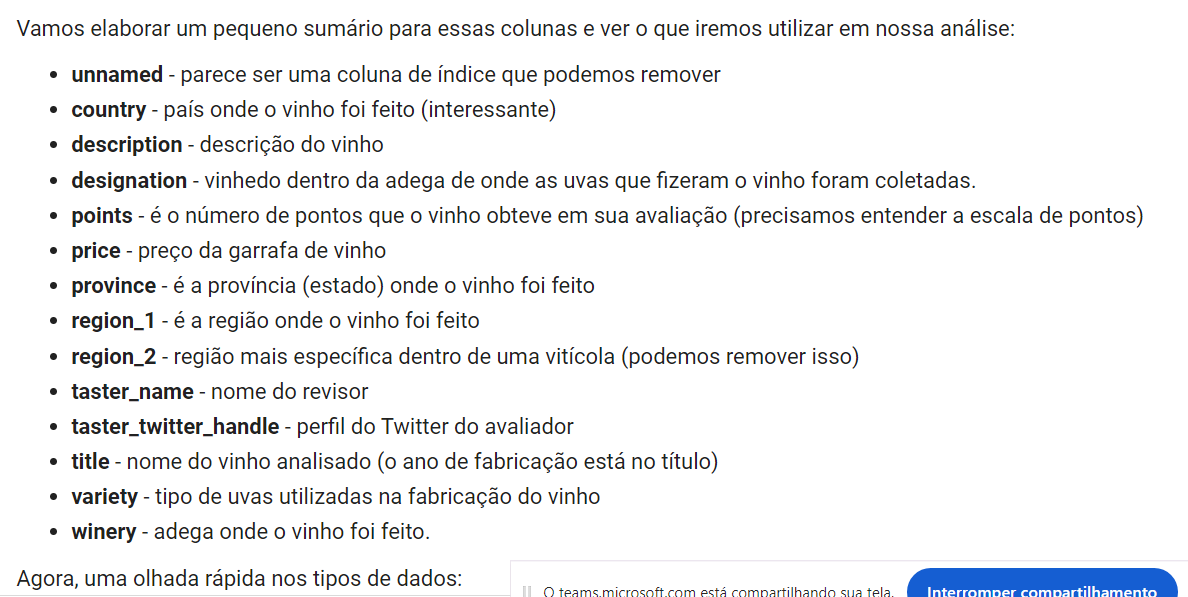

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Com esse comando podemos ver que etmo um total de 129.971 linhas e 14 colunas das quais temos algumas colunas que não são importantes para a analise, como o twitter e o nome do testador e também alguns dados faltantes, aonde faremos a normalização.

Vamos fazer uma pequena analise estatistica utilizando o describe.

In [6]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


De acordo com esses dados podemos entender que a garrafa mais cara custa $3.300 e a mais barata $4 o maximo de pontos é 80 pontos e o maximo 100 pontos.

De acordo com o site [Wine Enthusiast](https://www.wine-searcher.com/critics-17-wine+enthusiast)

**Wine Enthusiast's 100-point wine-scoring scale**
98–100 – Classic
94–97 – Superb
90–93 – Excellent
87–89 – Very good
83–86 – Good
80–82 – Acceptable

Usando a função value_counts() podemos contar quantos vinhos foram avaliados por cada país:

In [7]:
df['country'].value_counts()

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


Dessa forma já conseguimos retirar algumas observações como os paises que menos avaliam os vinhos são **Eslovaquia**, **China** e **Egito** enquanto o **USA** é o grande avaliador com o dobro de avaliações do segundo colocado que é a **França**

Também podemos validar os tipos de uvas que foram utilizadas para cada fabricação desses vinhos.

In [8]:
df['variety'].value_counts()

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Cabernet Sauvignon-Barbera,1
Sauvignonasse,1
Forcallà,1


Dessa formas vemos que temos 707 tipos de uvas e a **Pinot Noir** é a mais utilizada.

#Limpando Dados Inuteis

Fazemos um processo de limpeza na amostra para que a analise seja mais acertiva, removemdo os campos que estão vazios e as colunas que não vão ajudar na analise.

Para isso copiamos a colunas em outra variavel para se precisar temos um backup

In [13]:
df1 = df.copy()

Agora excluimos as colunas que não vamos utilizar.

In [14]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Agora precisamos resolver os dados ausentes

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


Podemos fazer alguns cálculos de proporção na coluna preço que aprensenta dados ausentes

In [16]:
print("{:.0%}".format(df1['price'].count() / df1.shape[0]))

93%


Então se removermos as linhas sem valores ficaremos com 93% da base.

E assim como a base é grande podemos remover os dados e filtrar por (country e veriety) que também contem dados nulos.

In [17]:
df1 = df1.dropna(subset=['country', 'price', 'variety'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


Agora todas os valores nulos foram excluidos

#Análise exploratória

Vamos visualizar os dados em uma grafico para ter um norte de como fazer a analise.

Text(0, 0.5, 'Frequencia')

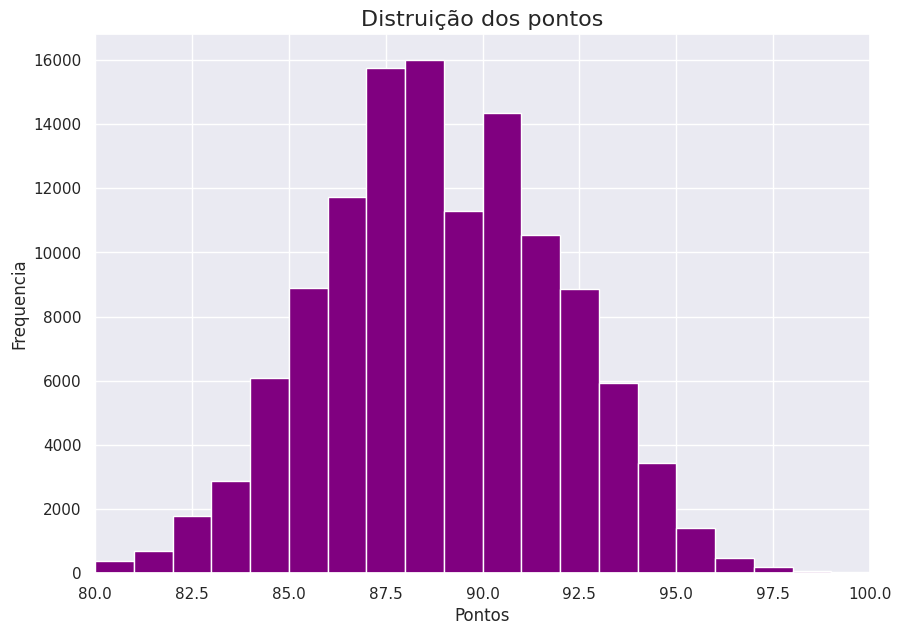

In [22]:
plt.figure(figsize=(10,7))
plt.hist(data=df1, x='points',
         bins=np.arange (80, df1['points'].max()+1, 1),
         color = 'purple')
plt.xlim(80,100)
plt.title('Distruição dos pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Frequencia')

In [23]:
country_top10 = df1['country'].value_counts()[:10]
country_top10

,count
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294


Text(0, 0.5, 'Total de Avaliações')

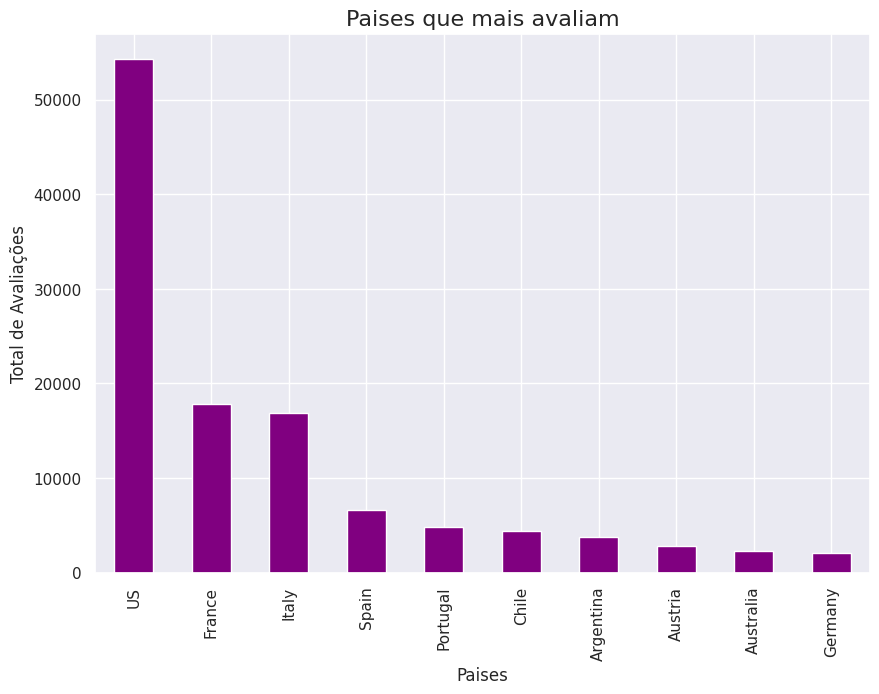

In [29]:
plt.figure(figsize=(10,7))
country_top10.plot(kind='bar', color='purple')
plt.title('Paises que mais avaliam', fontsize=16)
plt.xlabel('Paises')
plt.ylabel('Total de Avaliações')

In [31]:
melhor_qualidade = df1.groupby("country")['points'].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]
melhor_qualidade.to_frame().style.background_gradient(cmap='Purples', high=0.5)

,points
country,
England,91.550725
India,90.222222
Austria,90.190782
Germany,89.836321
Canada,89.377953
Hungary,89.165517
China,89.000000
France,88.734867
Luxembourg,88.666667


<ipython-input-36-dbd7bf59313c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'Páis')

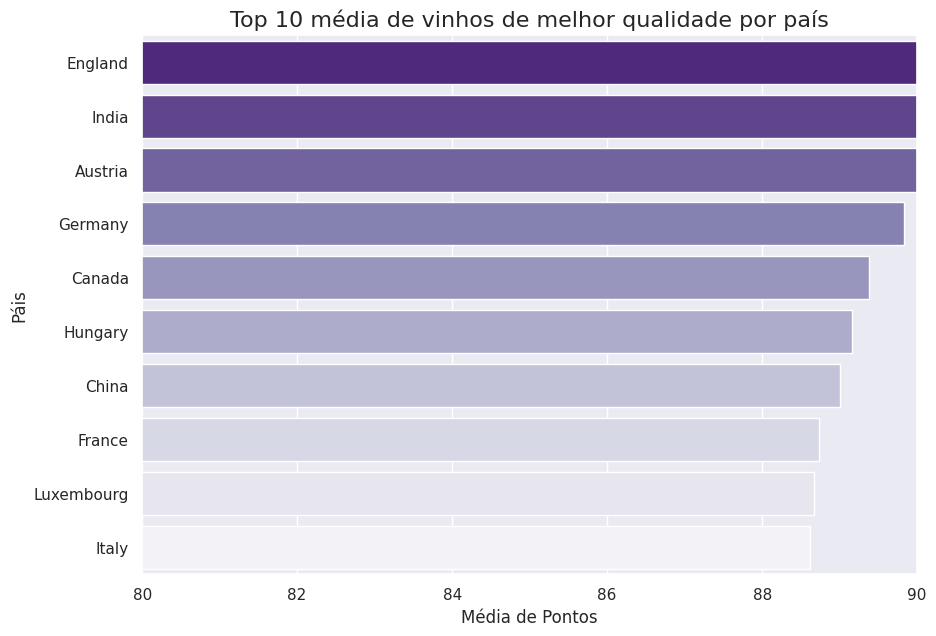

In [36]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade

plt.figure(figsize=(10,7))
plt.xlim(80, 90)
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Top 10 média de vinhos de melhor qualidade por país', fontsize=16)
plt.xlabel('Média de Pontos')
plt.ylabel('Páis')

In [38]:
#numeros de vinhos por páis com classificações mais altas 95-100
high_scores = df1[df1['points'] >= 95]
high_scores['country'].value_counts()

,count
country,
US,991
France,509
Italy,326
Austria,103
Portugal,96
Germany,62
Spain,51
Australia,47
Argentina,11


Text(0, 0.5, 'País')

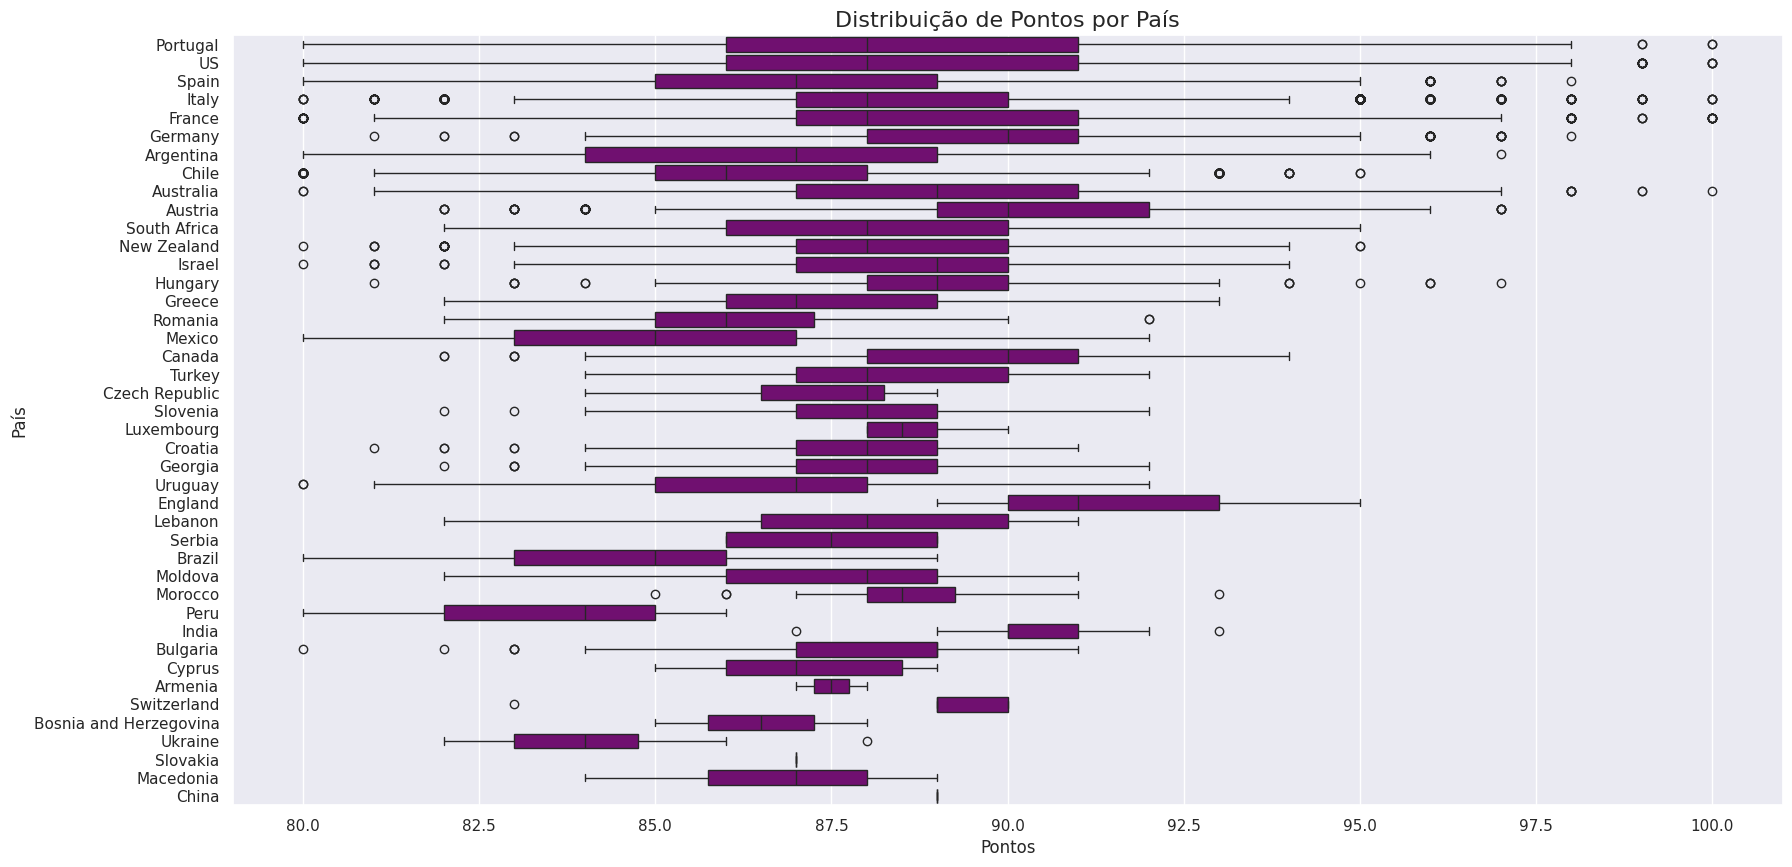

In [43]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1, x='points', y='country', color = 'Purple')
plt.title('Distribuição de Pontos por País', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('País')

<ipython-input-45-ccbcf211da69>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

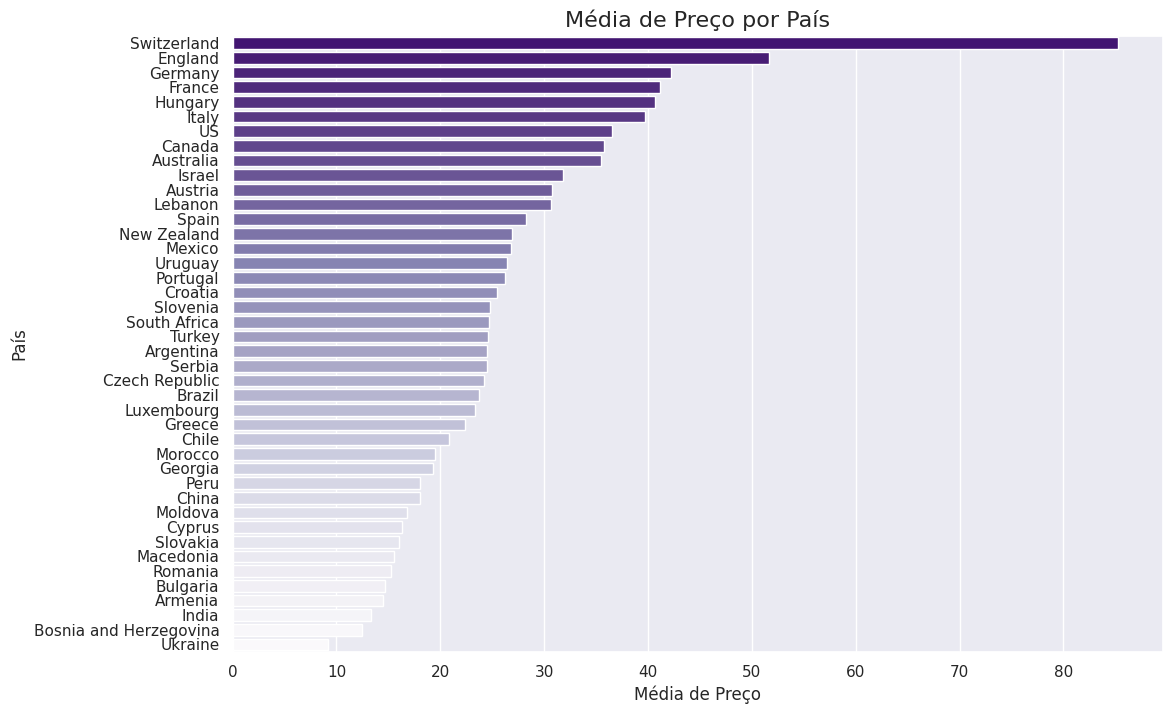

In [45]:
avarege_price = df1.groupby("country")['price'].mean()
avarege_price = avarege_price.sort_values(ascending=False)
y = avarege_price.index.to_series()
x = avarege_price.values

plt.figure(figsize=(12,8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Média de Preço por País', fontsize=16)
plt.xlabel('Média de Preço')
plt.ylabel('País')

<ipython-input-83-03d2619c7fc0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

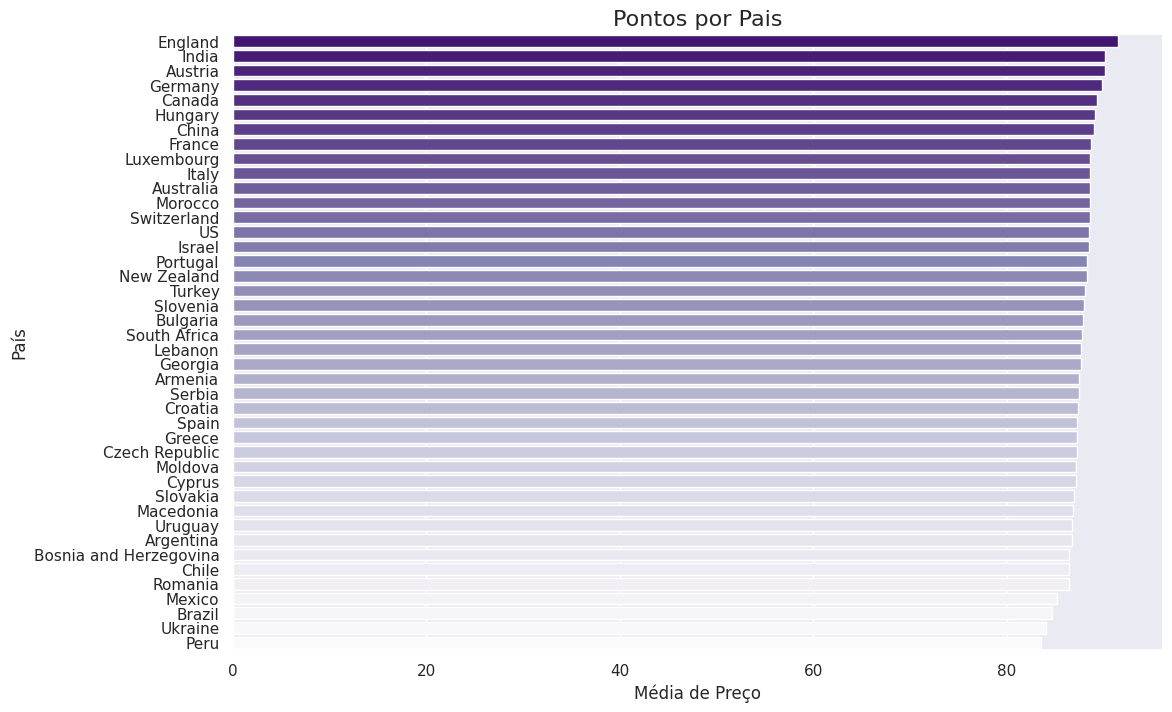

In [83]:
avarege_price = df1.groupby("country")['points'].mean()
avarege_price = avarege_price.sort_values(ascending=False)
y = avarege_price.index.to_series()
x = avarege_price.values

plt.figure(figsize=(12,8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Pontos por Pais', fontsize=16)
plt.xlabel('Média de Pontos')
plt.ylabel('País')

Text(0, 0.5, 'Frequência')

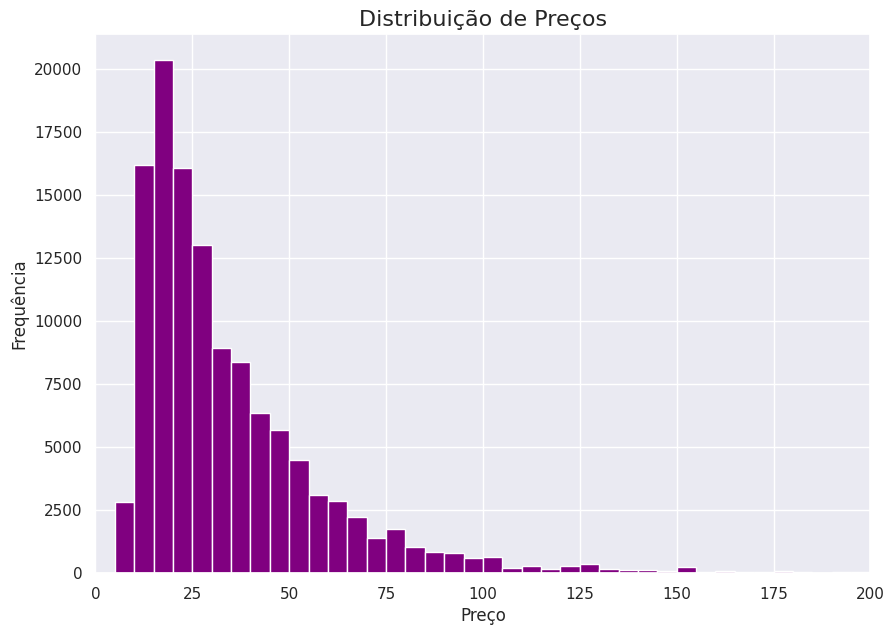

In [48]:
plt.figure(figsize=(10, 7))
bins = np.arange (0, df1["price"].max()+5, 5)
plt.hist(data=df1, x='price', bins=bins, color='purple')
plt.xlim(0, 200)
plt.title('Distribuição de Preços', fontsize=16)
plt.xlabel('Preço')
plt.ylabel('Frequência')

In [49]:
df1["price"].describe()

,price
count,120915.000000
mean,35.368796
std,41.031188
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [50]:
np.log10(df1["price"]).describe()

,price
count,120915.000000
mean,1.439570
std,0.284082
min,0.602060
25%,1.230449
50%,1.397940
75%,1.623249
max,3.518514


Text(0, 0.5, 'Frequência')

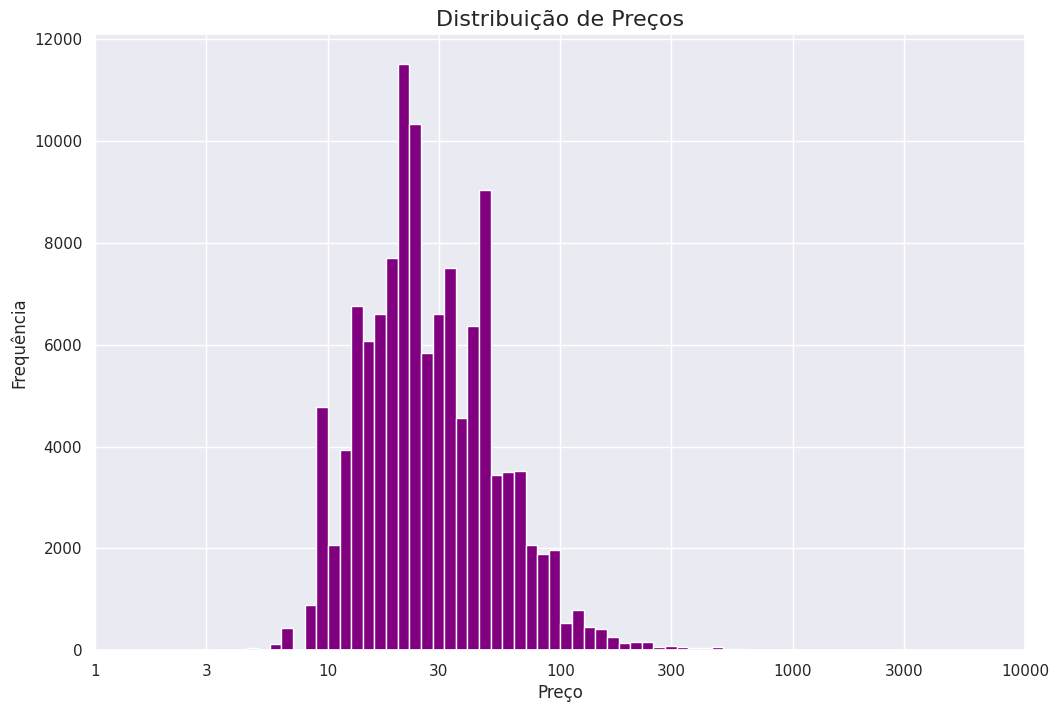

In [52]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color='purple')
plt.title('Distribuição de Preços', fontsize=16)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Preço')
plt.ylabel('Frequência')

Text(0, 0.5, 'Pontuação')

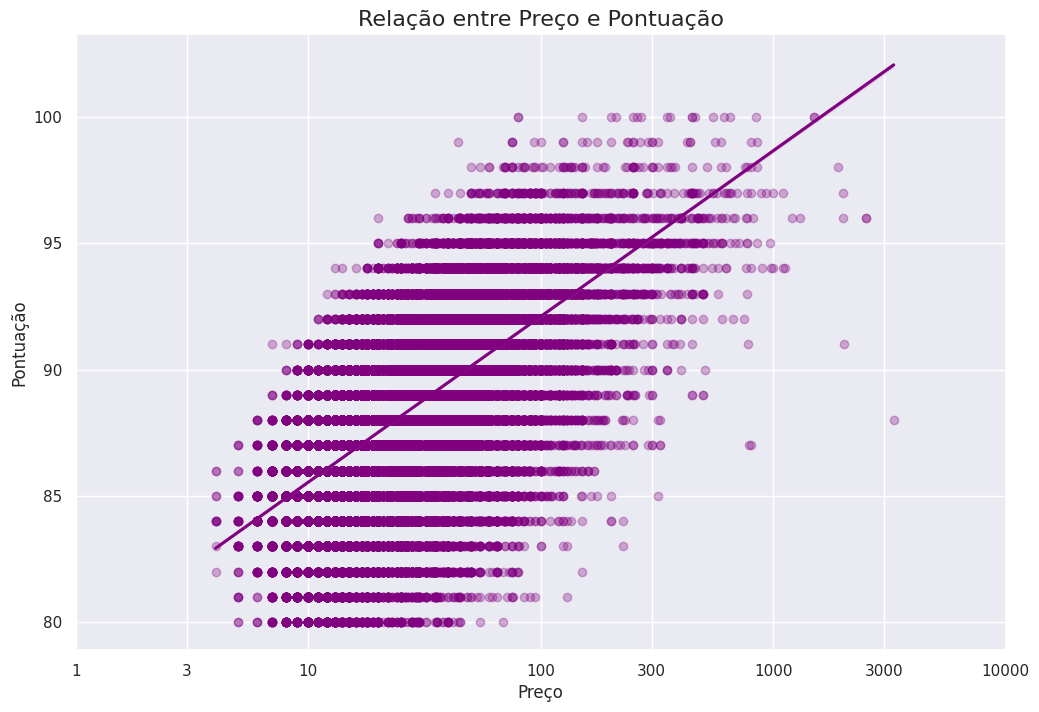

In [57]:
x = [1, 3, 10, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=df1, color='Purple', logx=True, scatter_kws={'alpha':0.3})
plt.title('Relação entre Preço e Pontuação', fontsize=16)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel('Preço')
plt.ylabel('Pontuação')

In [58]:
df1[df1['price'] == df1['price'].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


In [59]:
df1[df1['price'] == df1['price'].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


In [61]:
df1["variety"].value_counts()[:20]

,count
variety,
Pinot Noir,12785
Chardonnay,11077
Cabernet Sauvignon,9384
Red Blend,8466
Bordeaux-style Red Blend,5340
Riesling,4971
Sauvignon Blanc,4780
Syrah,4086
Rosé,3261


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Rosé'),
  Text(9, 0, 'Merlot'),
  Text(10, 0, 'Zinfandel'),
  Text(11, 0, 'Malbec'),
  Text(12, 0, 'Sangiovese'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Portuguese Red'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Pinot Gris')])

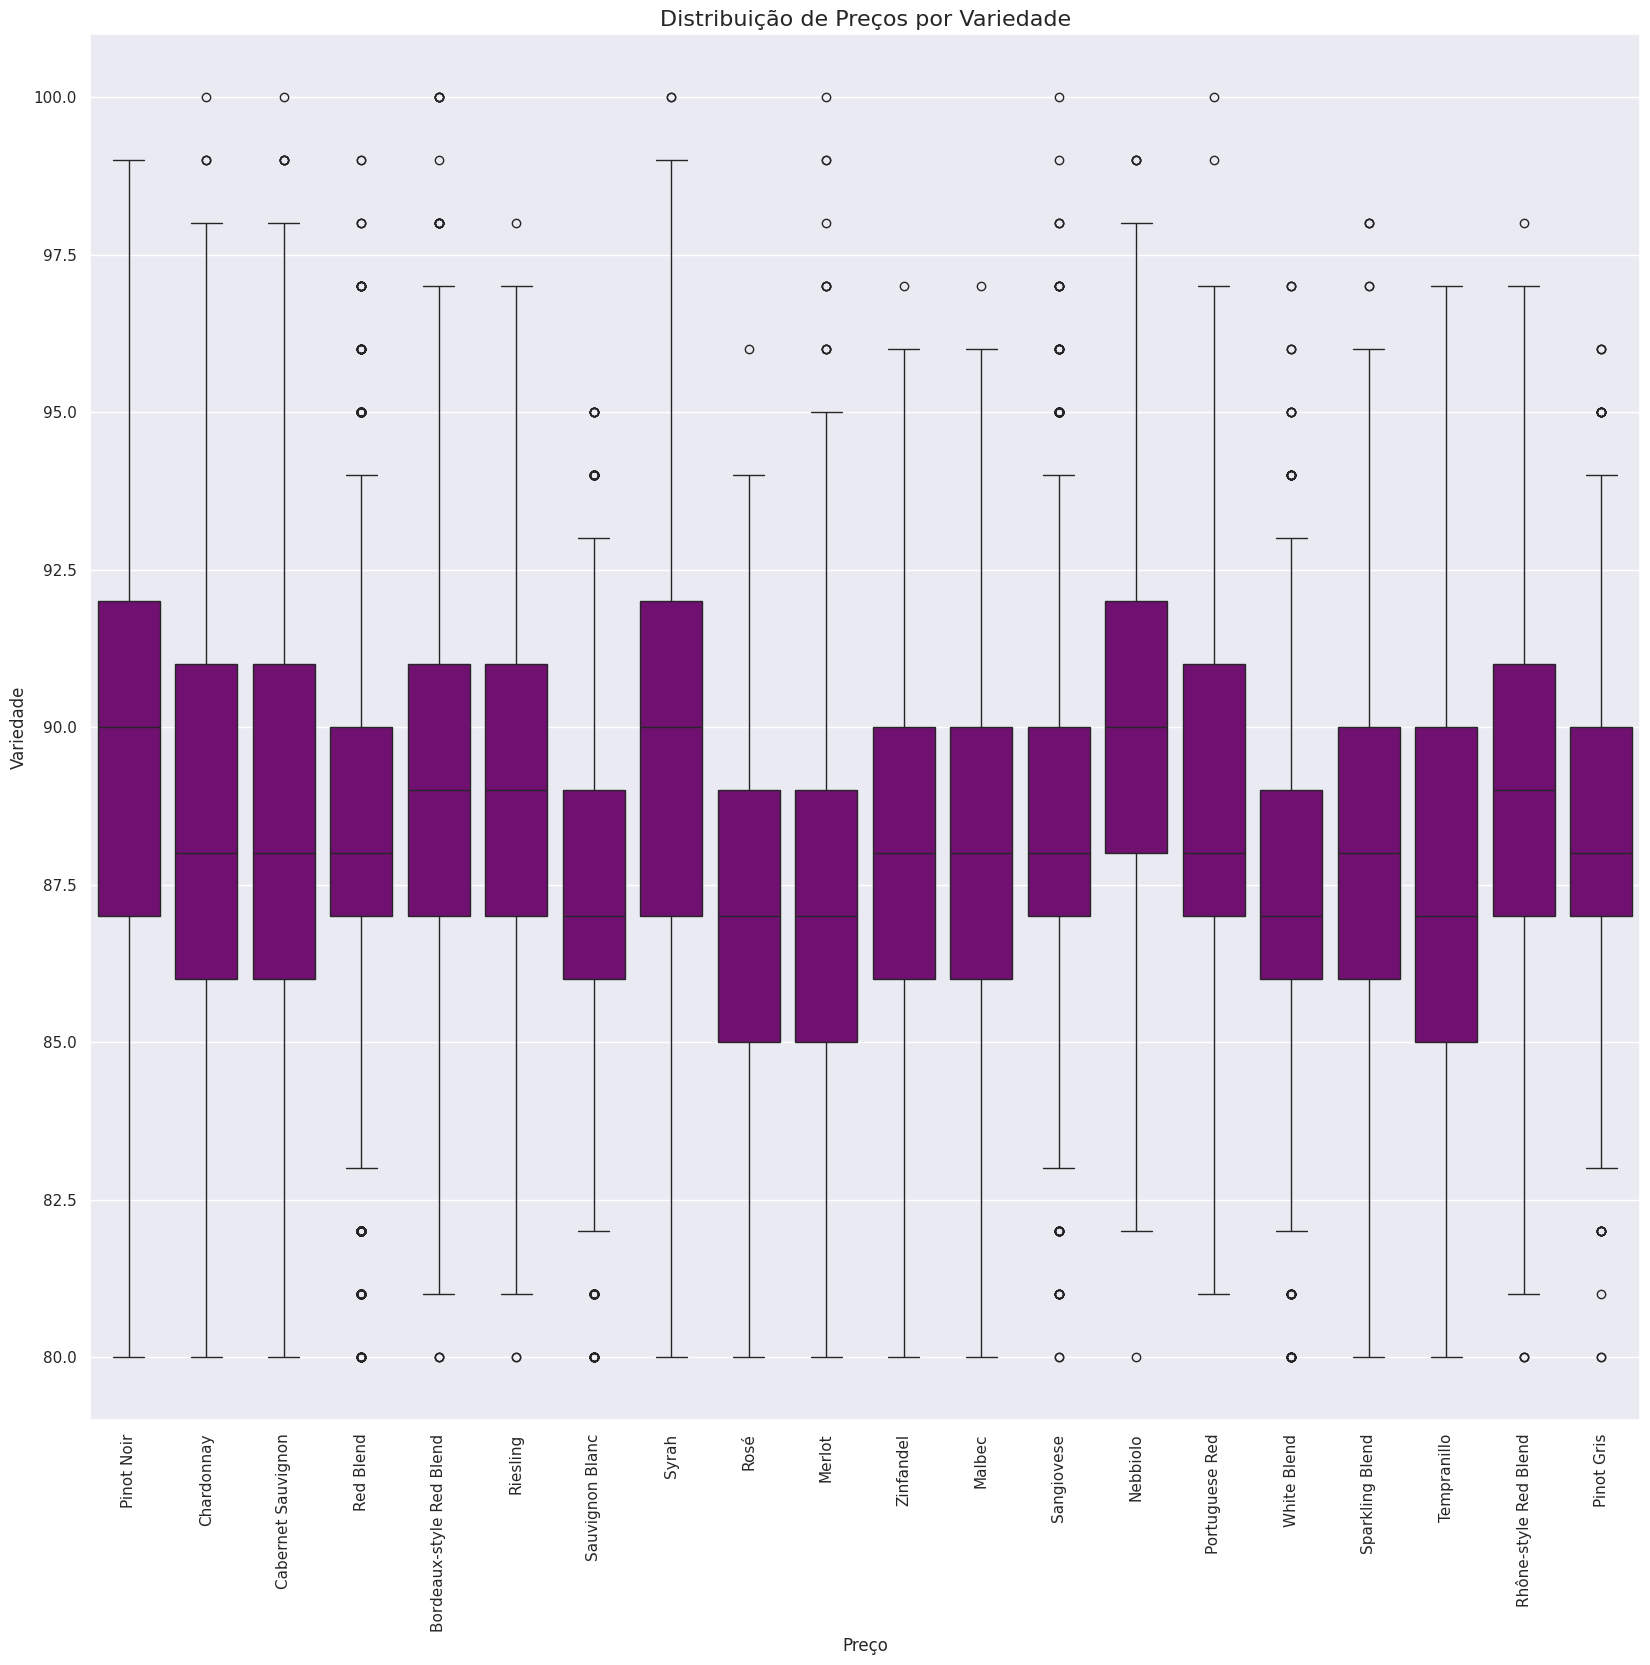

In [63]:
plt.figure(figsize=(20, 18))
sns.boxplot(data=df1,
            x='variety',
            y='points',
            color='Purple',
            order=df1['variety'].value_counts().iloc[:20].index)
plt.title('Distribuição de Preços por Variedade', fontsize=16)
plt.xlabel('Preço')
plt.ylabel('Variedade')
plt.xticks(rotation=90)

In [69]:
under_15 = df1.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15['price'] <= 15]
under_15 = under_15.sort_values(by='points', ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd', high=0.5, subset=['price'])

,country,points,price,title,variety
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
129572,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend
74042,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino
43193,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier
9609,France,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot
59823,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier


In [68]:
between_15_and_30 = df1.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query("price > 15 and price <= 30")
between_15_and_30 = between_15_and_30.sort_values(by='points', ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap='YlOrRd', high=0.5, subset=['price'])

,country,points,price,title,variety
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache


In [70]:
between_30_and_50 = df1.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query("price > 30 and price <= 50")
between_30_and_50 = between_30_and_50.sort_values(by='points', ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=['price'])

,country,points,price,title,variety
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay
1560,US,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend
47432,US,97,50.000000,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay
4504,US,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel
114981,US,97,35.000000,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah
45986,France,97,45.000000,Château Coutet 2014 Barsac,Bordeaux-style White Blend
125831,US,97,50.000000,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay
16524,Portugal,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port),Port
128268,US,97,50.000000,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon
89730,France,97,50.000000,René Muré 2015 Clos Saint Landelin Vorbourg Grand Cru Riesling (Alsace),Riesling


In [71]:
above_50 = df1.drop(["description", "province", "winery"], axis=1)
above_50 = above_50.query("price > 50")
above_50 = above_50.sort_values(by='points', ascending=False)[:10]
above_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=['price'])

,country,points,price,title,variety
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah
111755,France,100,1500.000000,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
89729,France,100,617.000000,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese
111753,France,100,1500.000000,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red


In [77]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = df1['description'][1]
text = " ".join(i for i in df1['description'])
len(text)

29653210

In [79]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=2048,
                      height=1024,
                      max_words=1000).generate(text)

(-0.5, 2047.5, 1023.5, -0.5)

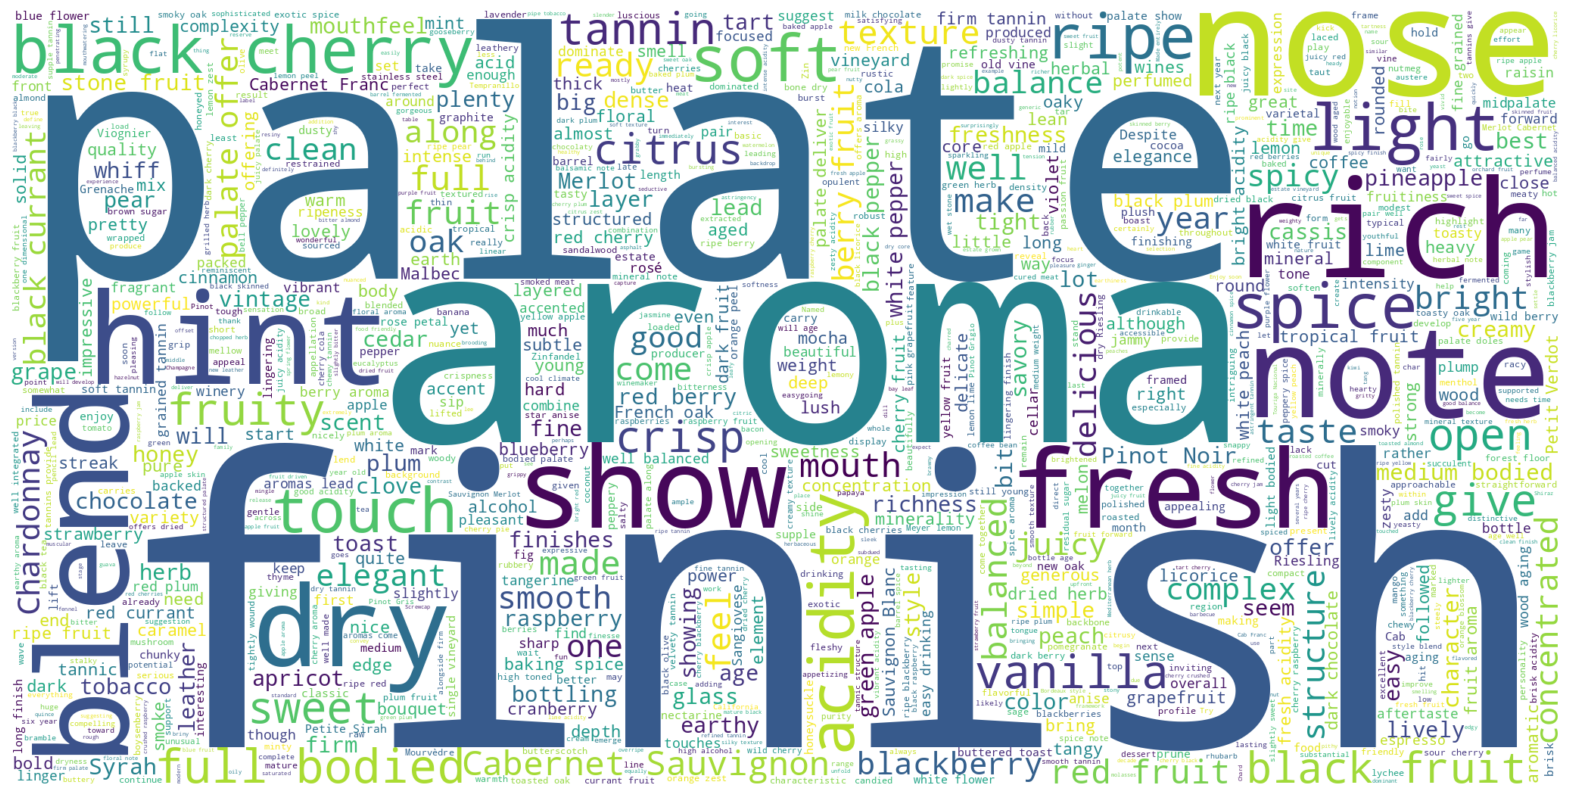

In [80]:
plt.figure(figsize=(20,18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#Conclusão

Agora podemos finalmente responder as perguntas que recebemos no começo deste projeto.

**• De onde vem o melhor vinho?**

R: A Inglaterra é quem em média produz vinhos soberbos. Mas se você quiser uma garrafa com pontuação perfeita de 100 deve observar
os vinhos de outros países: França, Itália, EUA, Portugal ou Austrália.

**• O preço do vinho está relacionado com a qualidade?**

R: É nítido que o preço do vinho está relacionado com a qualidade. Mas se você souber onde procurar, pode encontrar um vinho de \$4
que possui apenas 3 pontos abaixo de uma garrafa que custa \$3.300.

**• Certas variedades de uvas são de maior qualidade?**

R: Todas as variedades estão na mesma situação (niveladas). A maior aposta com base nos dados é Pinot Noir.

**• Qual é o melhor vinho em cada faixa de preço?**

R: Encontramos um vinho perfeito para cada orçamento. Com alguns destaques.

**• Que palavras são mais utilizadas para descrever um vinho?**

R: Como pudemos ver na nuvem de palavras, certos termos aparecem uma vez ou outra nas descrições, termos como finish e pacate
aparecem em boa parte das avaliações.

**Minhas Perguntas**

**• Como o Brasil é classificado na lista de vinhos?**

R: De acordo com a média de pontos o Brasil está em terceiro colocado de baixo para cima em relação aos pontos.

**• De onde são os piores vinhos?**

R: De acordo com o Grafico Média de Pontos, feito por mim, Os paises com menos pontos em relação as vinhos são Peru, Ucrania e Brasil